In [36]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [37]:
(images, labels), _ = mnist.load_data()
X = images
y = labels

In [38]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [39]:
 print(X_train.shape)

(60000, 28, 28)


In [40]:
X_train[0].min(),X_train[0].max()

(0, 255)

In [41]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()
(0.0, 1.0)

(0.0, 1.0)

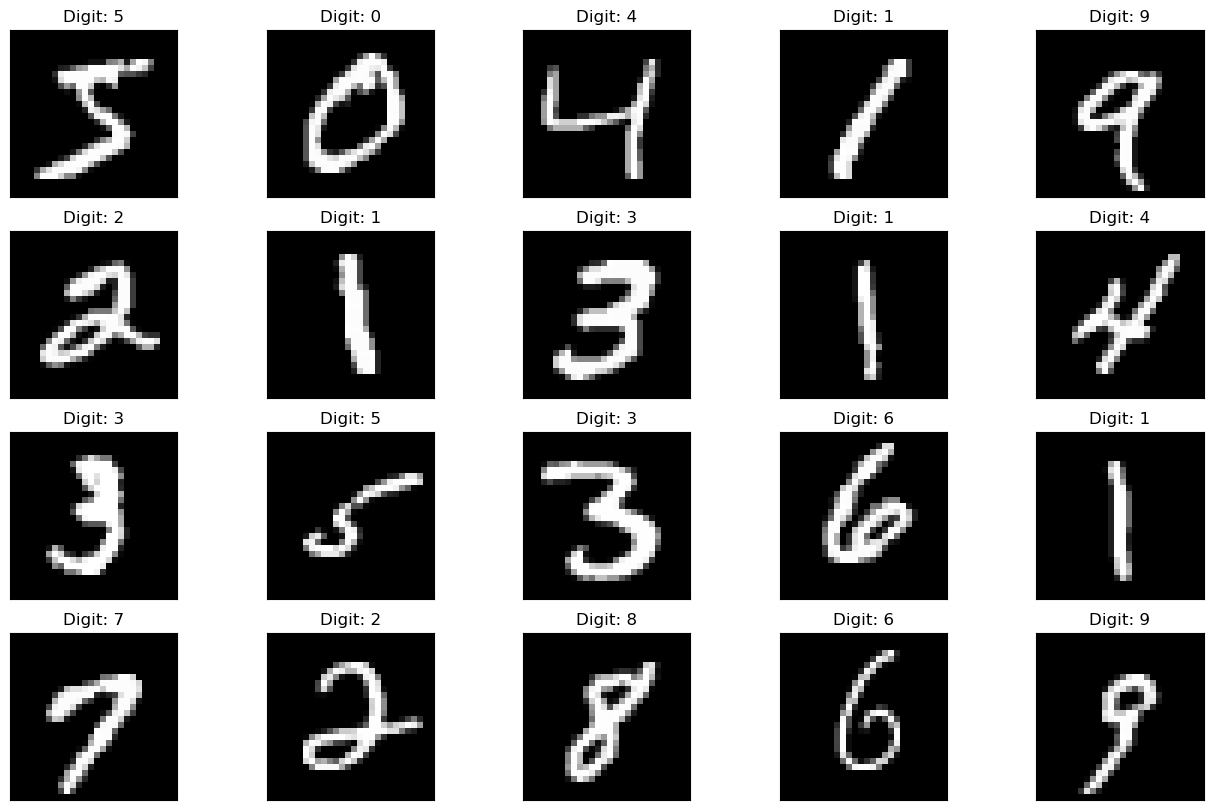

In [45]:
 def plot_digit(image, digit, plt, i):
     plt.subplot(4, 5, i + 1)
     plt.imshow(image, cmap=plt.get_cmap('gray'))
     plt.title(f"Digit: {digit}")
     plt.xticks([])
     plt.yticks([])
plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)
plt.show()
  


In [46]:
X_tarin = X_train.reshape((X_train.shape+ (1,)))
X_test = X_test.reshape((X_test.shape+(1,)))

In [47]:
 y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [48]:
model = Sequential([
Conv2D(32,(3,3), activation="relu",input_shape=(28,28,1)),
MaxPooling2D((2,2)),
Flatten(),
Dense(100,activation="relu"),
Dense(10,activation="softmax")
])

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
optimizer=optimizer,
loss="sparse_categorical_crossentropy",
metrics=["accuracy"]
)

In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │         540,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42)
# Now you can use X_val and y_val in model.fit
Model_log = model.fit(
X_train,
y_train,
epochs=10,
batch_size=15,
verbose=1,
validation_data=(X_val, y_val)
)

Epoch 1/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.1097 - loss: 5.2061 - val_accuracy: 0.0981 - val_loss: 2.3031
Epoch 2/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.1057 - loss: 2.3028 - val_accuracy: 0.1082 - val_loss: 2.3018
Epoch 3/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.1069 - loss: 2.3032 - val_accuracy: 0.0981 - val_loss: 2.3022
Epoch 4/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.1099 - loss: 2.3024 - val_accuracy: 0.1102 - val_loss: 2.3038
Epoch 5/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.1126 - loss: 2.3025 - val_accuracy: 0.1082 - val_loss: 2.3037
Epoch 6/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.1086 - loss: 2.3030 - val_accuracy: 0.1102 - val_loss: 2.3022
Epoch 7/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.1085 - loss: 2.3028 - val_accuracy: 0.1082 - val_loss: 2.3029
Epoch 8/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.1106 - loss: 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


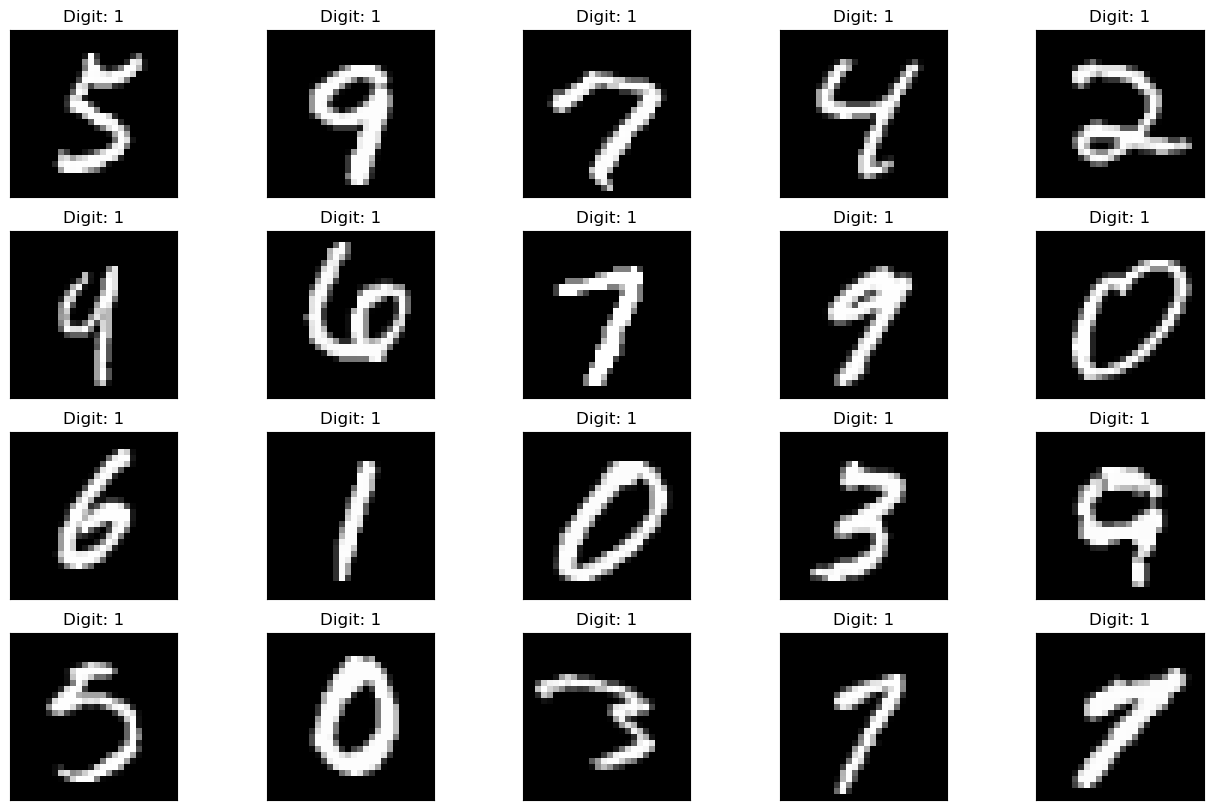

In [54]:
plt.figure(figsize=(16, 10))
for i in range(20):
     image = random.choice(X_test).squeeze()
     digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
     plot_digit(image, digit, plt, i)
plt.show()

In [55]:
predictions = np.argmax(model.predict(X_test),axis=-1)
accuracy_score(y_test,predictions)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


0.1135

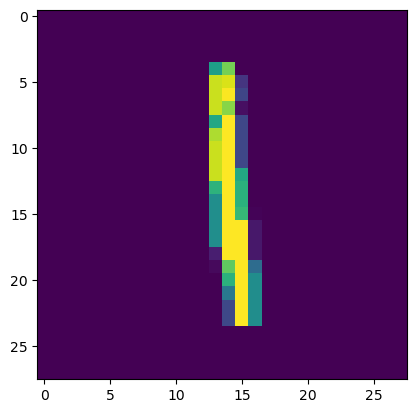

In [56]:
n = random.randint(0,9999)
plt.imshow(X_test[n])
plt.show()
